# Random Forest

In this lab you will learn the most important aspects of the random forest learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import RandomForestClassifier.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import make_classification, make_regression, make_blobs

## Data Creation

First of all, we create a data set containing 1000 samples with 2 features and two classes:

In [3]:
X, y = make_classification(n_samples = 1000,n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

<b>Exercise 1:</b>

Visualize the data set. It should look like this:
<img src="figures/dataset.png" width="600"/>

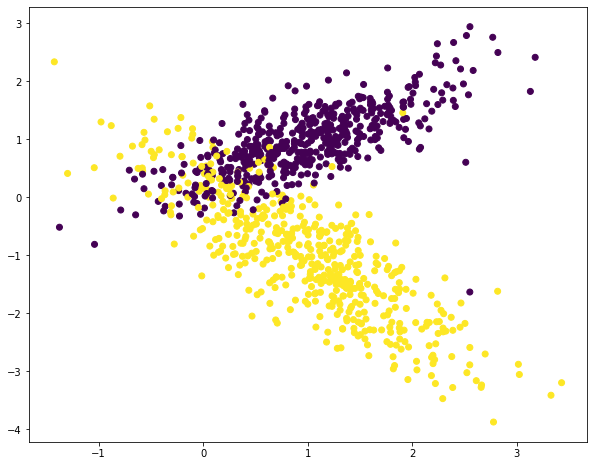

In [44]:
### WRITE YOUR CODE HERE ###
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

<b>Exercise 2:</b>

We split our data into train and test data. Then we can train our model (a random forest) on the train data and evaluate the model on the hold out test data. We split the data in a way that we train our model on 67% of the data and test our model on 33% of the data.

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

Train a random forest on the training data and report the accuracy for this model on the train and test data using the default parameters of a random forest (from sklearn). What can you conclude from this? .

In [28]:
clf = RandomForestClassifier()
### WRITE YOUR CODE HERE ###
clf.fit(X_train, y_train)
pred_train = clf.predict(X_test)
print('Accuracy on training data is {}'.format(clf.score(X_train,y_train)))
print('Accuracy on testing data is {}'.format(clf.score(X_test,y_test)))

Accuracy on training data is 1.0
Accuracy on testing data is 0.9272727272727272


In [29]:
np.sum(pred_train == y_test)/len(y_test) * 100

92.72727272727272

## Decision Boundary

Sometimes it is helpful to plot the decision boundary for a learned model. To do so, we create a grid of data points and calculate the probability of belonging to class 1. 
(This can only be done once we have trained the random forest classifier)

In [10]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

In [17]:
yy.ravel().size

3381

Then we can plot the boundary using the 'contourf' function of matplotlib.

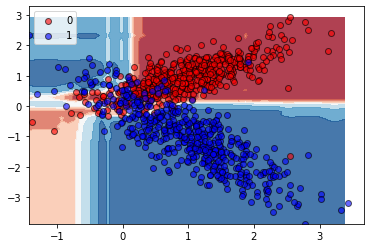

In [14]:
cm = plt.cm.RdBu  # color map
plt.contourf(xx, yy, Z, alpha=.8, cmap=cm)
colors = ['red','blue']
for cur_class in [0,1]:
    plt.scatter(X[y==cur_class, 0], X[y == cur_class, 1], c=colors[cur_class],
                       edgecolors='k', alpha=0.6, label=cur_class)
plt.legend()
plt.show()

What can you conclude from the figure above?

## Parameter Selection

The implementation of the random forest algorithm in sklearn has many parameter. The most important ones are the number of trees used (n_estimators) and the maximal depth of a single tree (max_depth). Investigate how the number of used trees effects the training and testing accuracy.

<b>Exercise 3:</b>

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 20) used. This plot should look like this:
<img src="figures/num_trees.png" width="600"/>

In [90]:
def train(check, limit, n_estimators = 30):
    accuracy = {'train':[],'test':[]}
    for n in range(1,limit+1):
        if(check):
            clf = RandomForestClassifier(n_estimators = n)
        else:
            clf = RandomForestClassifier(n_estimators, max_depth = n)
        clf.fit(X_train, y_train)
        pred_train = clf.predict(X_train)
        accuracy['train'].append(clf.score(X_train,y_train))
        accuracy['test'].append(clf.score(X_test,y_test))
    return accuracy

In [91]:
def plot_acc(accuracy):
    plt.figure(figsize = (12,8))
    plt.plot(accuracy['train'], label = 'train acc')
    plt.plot(accuracy['test'], label = 'test acc')
    plt.legend()
    plt.xlabel('Number of trees used')
    plt.ylabel('Accuracy')
    plt.show()

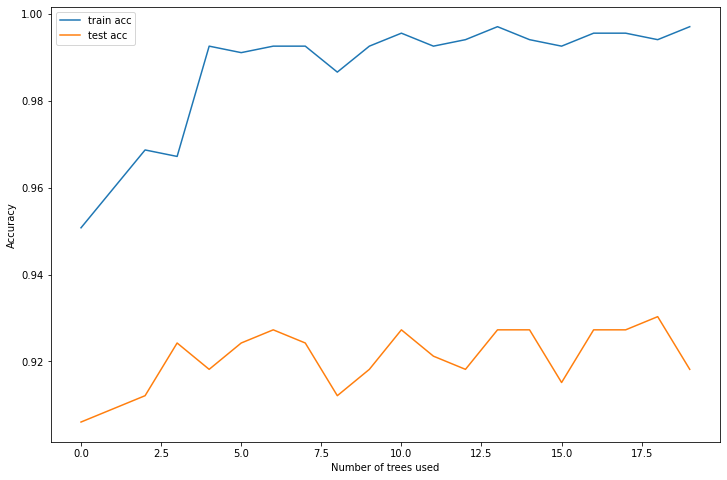

In [96]:
### WRITE YOUR CODE HERE ###
accuracy = train(check = True, limit = 20)
plot_acc(accuracy)

<b>Optional:</b>

We want to further investigate how the number of used trees effects the training and testing accuracy. 
We want to increase the number of trees to a maximum of 50.

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 50) used.

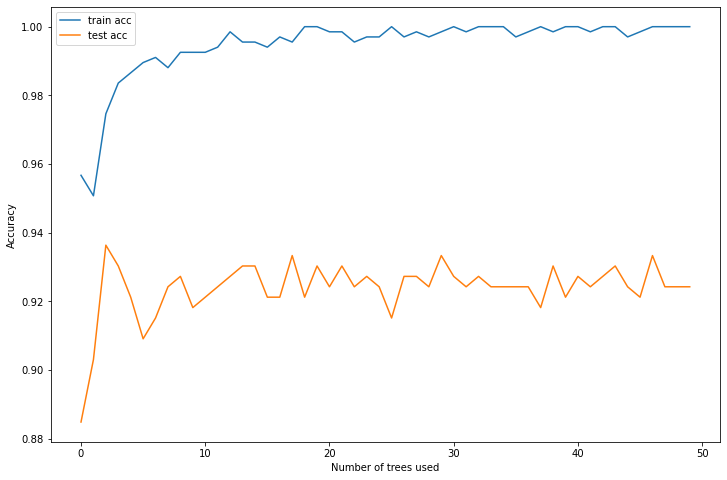

In [97]:
### WRITE YOUR CODE HERE ###
accuracy = train(check = True, limit = 50)
plot_acc(accuracy)

<b>Exercise 4:</b>

We saw how the number of trees influences training and testing accuracy. 
Now we do same thing for the other important parameter max_depth.
Train multiple models with different depths. 
The models should use 30 trees as estimators.

Plot a diagram that shows the training and testing accuracy depending on the maximal depth of a single tree (from 1 to 50). 
This plot should look like this:
<img src="figures/max_depth.png" width="600"/>

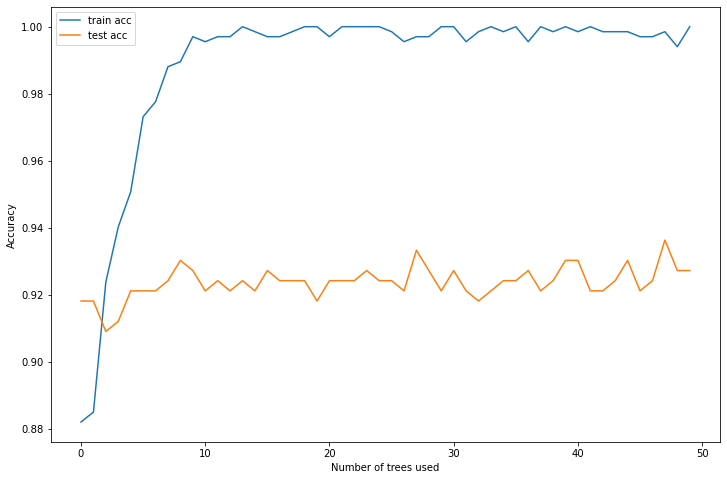

In [99]:
### WRITE YOUR CODE HERE ###
accuracy = train(check = False, limit = 50)
plot_acc(accuracy)

## Churn Data Set
Lets revisit the churn data set from the first tutorial.

In [100]:
churn_df = pd.read_csv('telecom_churn.csv')
label = churn_df['Churn']
churn_df = churn_df.drop(columns=['Churn'])

<b>Exercise 5:</b>

Create a data set containing only the numeric values. <b>Optional:</b> Try to convert all non numeric values to numeric values using a one hot encoding or by binning them. 

In [101]:
### WRITE YOUR CODE HERE ###
churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [102]:
churn_df["International plan"] = churn_df["International plan"].replace({'Yes':1,'No':0})
churn_df["Voice mail plan"] = churn_df["Voice mail plan"].replace({'Yes':1,'No':0})
churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [103]:
len(list(churn_df.State.unique()))

51

In [104]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
#col_names = [str(val)+str(i) for i, val in enumerate(list(churn_df['State'].unique()))]
OH_col = pd.DataFrame(OH_encoder.fit_transform(churn_df[['State']]))
OH_col.columns = OH_encoder.get_feature_names(['State'])
new_df = churn_df.drop(['State'],axis = 1)
OH_df = pd.concat([new_df,OH_col], axis = 1)
OH_df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<b>Exercise 6:</b>

Train a model on this data set and visualize the most important features in a figure. This should look like this (The scaling and order of features can be different):
<img src="figures/importance.png" width="600"/>

<b>Hint</b>: The method feature_importance_ should be used.
What can you conclude?

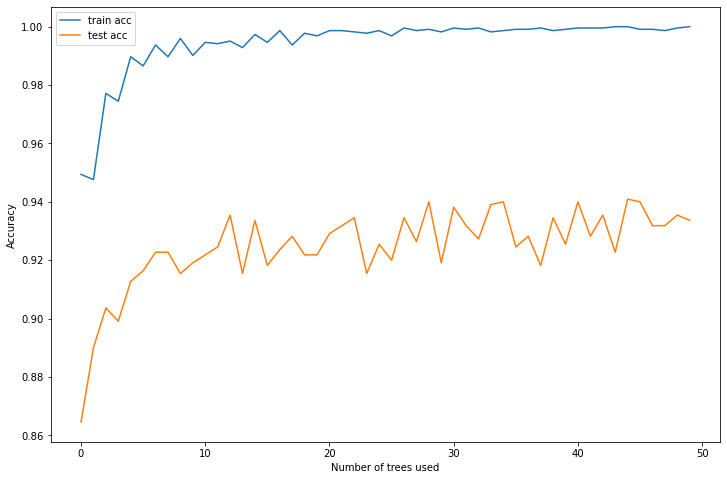

In [106]:
### WRITE YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(OH_df, label, test_size=.33, random_state=42)
accuracy = train(check = True, limit = 50)
plot_acc(accuracy)

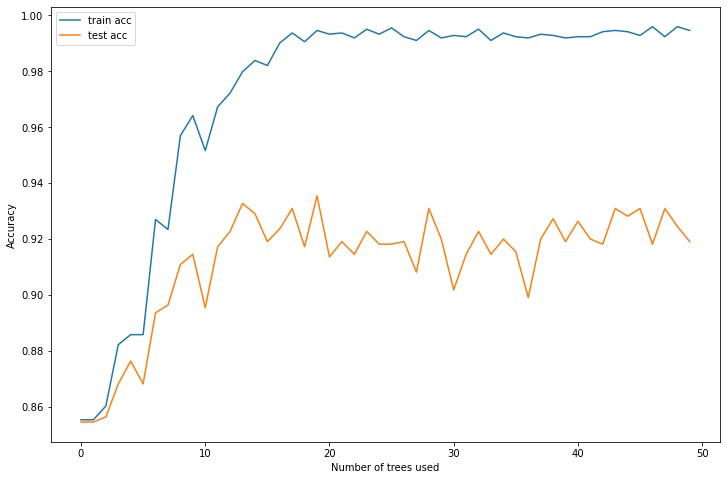

In [107]:
accuracy = train(check = False, limit = 50, n_estimators = 12 )
plot_acc(accuracy)

In [115]:
clf = RandomForestClassifier(n_estimators = 12, max_depth = 20)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9245454545454546

Text(0.5, 1.0, 'Feature Importance for features')

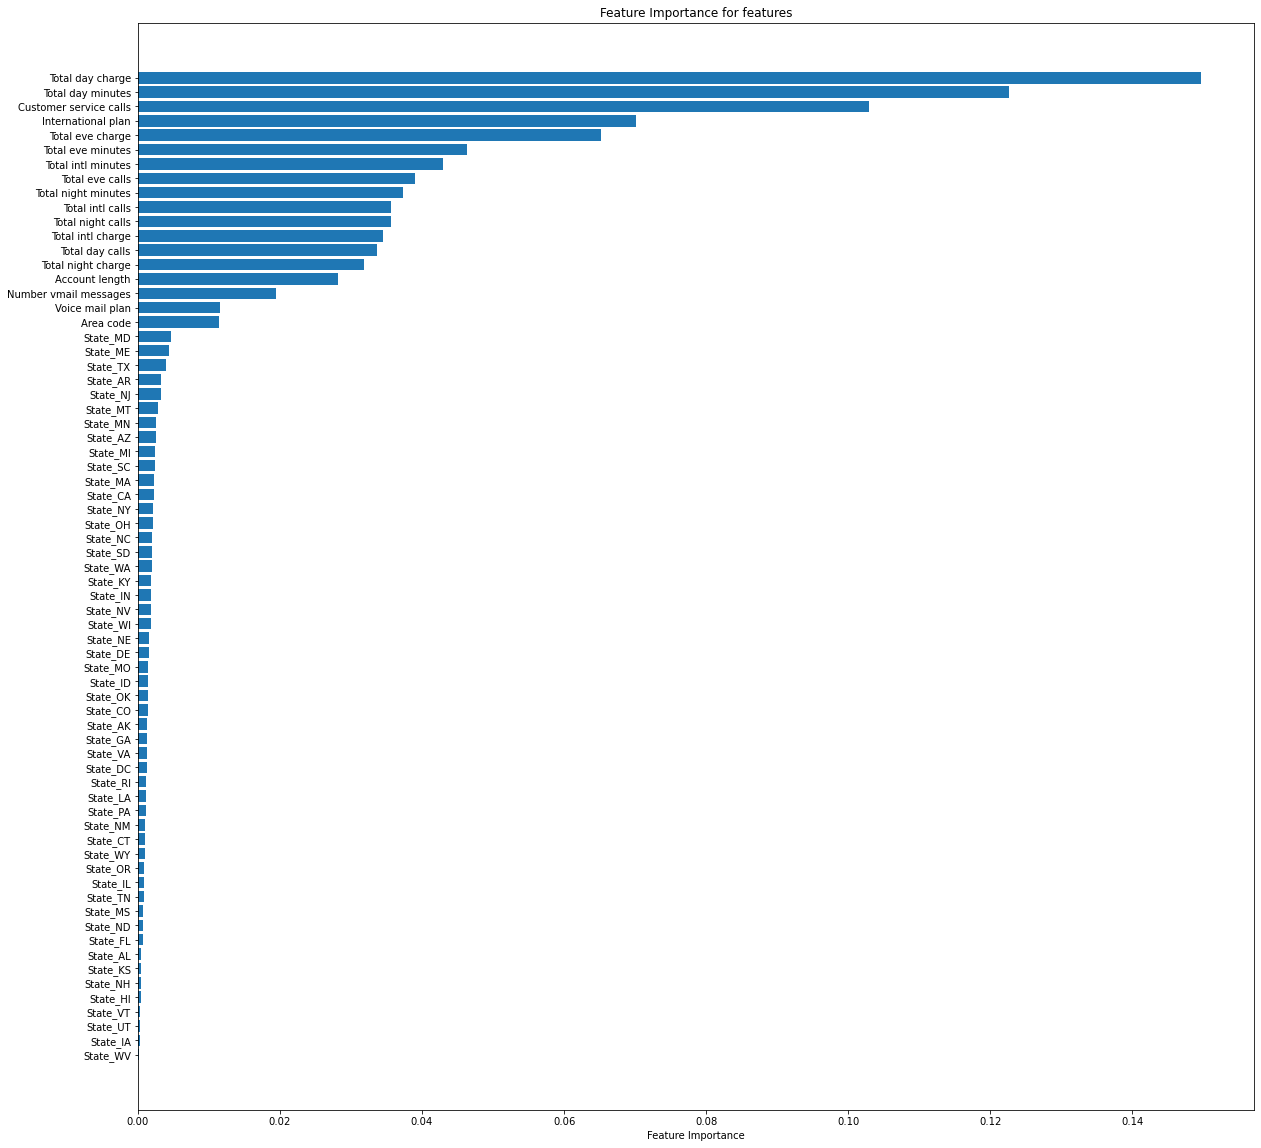

In [124]:
plt.figure(figsize = (20,20))
sorted_idx = clf.feature_importances_.argsort()
plt.barh(OH_df.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance for features")

<b>Exercise 7:</b>

If we want to use a random forest to solve regression problems we can use the RandomForestRegressor from sklearn.
* Generate an easy regression data set using make_regression with 10 features. (use function make_regression)
* Split the data set into a train and test set.
* Train a model and report the training and testing mean square error (can be calculated using sklearn.metrics.mean_squared_error)

In [125]:
### WRITE YOUR CODE HERE ###
X, y = make_regression(n_samples = 1000,n_features=10,n_informative=10)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [142]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train,y_train)
mean_squared_error(y_test,clf.predict(X_test))

5544.766603805042

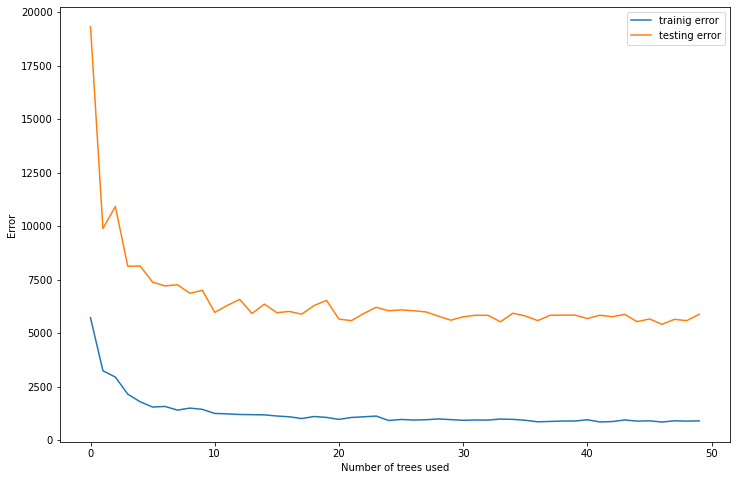

In [143]:
from sklearn.metrics import mean_squared_error
error = {'train':[],'test':[]}
for n in range(1,51):
    clf = RandomForestRegressor(n_estimators = n)
    clf.fit(X_train,y_train)
    error['train'].append(mean_squared_error(y_train,clf.predict(X_train)))
    error['test'].append(mean_squared_error(y_test,clf.predict(X_test)))
plt.figure(figsize = (12,8))
plt.plot(error['train'], label = 'training error')
plt.plot(error['test'], label = 'testing error')
plt.legend()
plt.xlabel('Number of trees used')
plt.ylabel('Error')
plt.show()

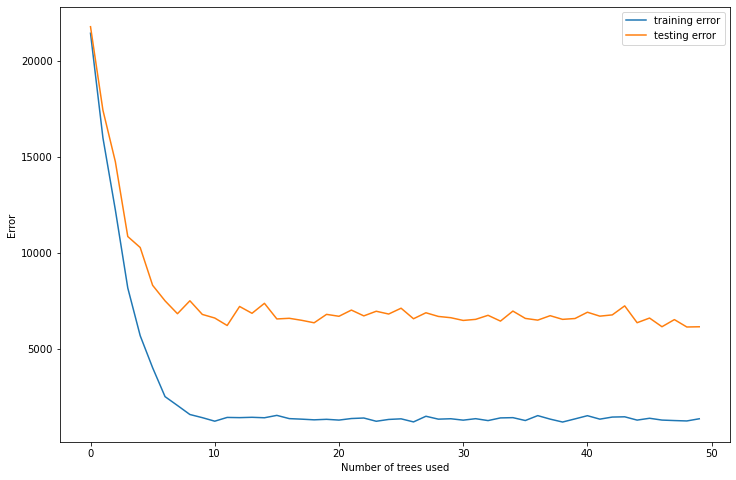

In [145]:
from sklearn.metrics import mean_squared_error
error = {'train':[],'test':[]}
for n in range(1,51):
    clf = RandomForestRegressor(n_estimators = 10, max_depth = n)
    clf.fit(X_train,y_train)
    error['train'].append(mean_squared_error(y_train,clf.predict(X_train)))
    error['test'].append(mean_squared_error(y_test,clf.predict(X_test)))
plt.figure(figsize = (12,8))
plt.plot(error['train'], label = 'training error')
plt.plot(error['test'], label = 'testing error')
plt.legend()
plt.xlabel('Number of trees used')
plt.ylabel('Error')
plt.show()